R-squared value: 0.7340


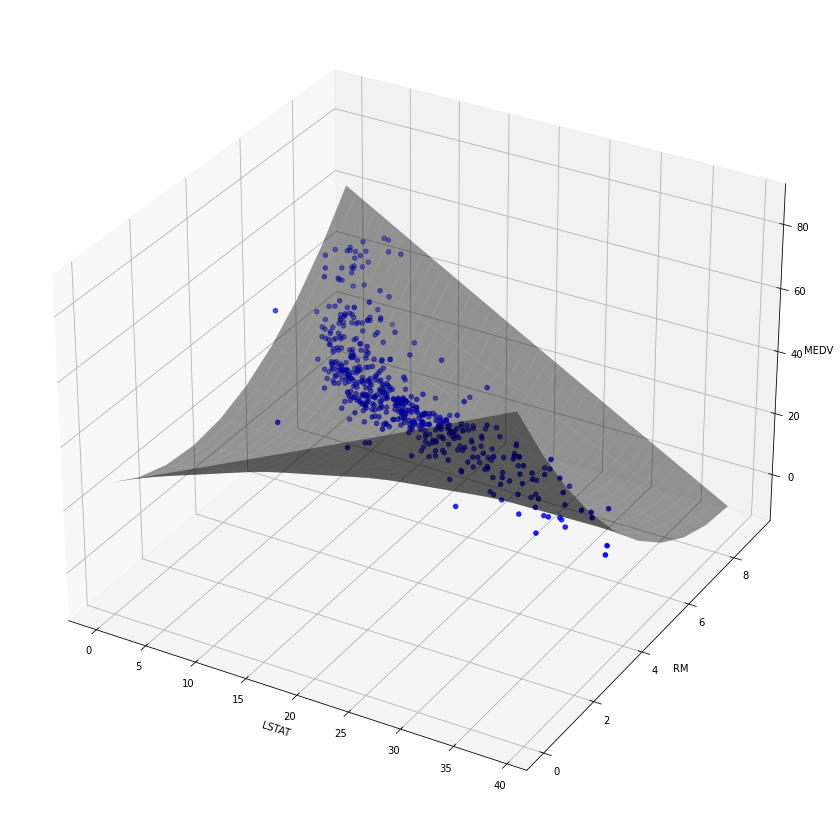

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D

#load dataset, for data cleaning see linear regression 
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT', 'RM'])
y = df['MEDV']

x_train, x_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3, random_state = 5)

#making the polynomial

poly_features = PolynomialFeatures(degree = 2)
x_train_poly = poly_features.fit_transform(x_train)


#training the model
model = LinearRegression()
model.fit(x_train_poly, Y_train)

#testing the model
x_test_poly = poly_features.fit_transform(x_test)
print('R-squared value: %.4f' % model.score(x_test_poly, Y_test))

#plotting the 3d hyperplane
fig = plt.figure(figsize =(18,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['LSTAT'], x['RM'], y, c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

x_surf = np.arange(0,40,1)
y_surf = np.arange(0,10,1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z= lambda x,y: (model.intercept_ + model.coef_[1]*x + model.coef_[2]*y + model.coef_[3]* x**2 + model.coef_[4]* x*y + model.coef_[5] * y**2)
ax.plot_surface(x_surf, y_surf, z(x_surf, y_surf), rstride = 1, cstride = 1, color = 'None', alpha = 0.4)